# Geometric Programming (GP)

In [1]:
versioninfo()

Julia Version 1.4.0
Commit b8e9a9ecc6 (2020-03-21 16:36 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.6.0)
  CPU: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, skylake)


In [2]:
using Pkg
Pkg.activate("../..")
Pkg.status()

 Activating environment at `~/Dropbox/class/M1399.000200/2020/Project.toml`


Status `~/Dropbox/class/M1399.000200/2020/Project.toml`
  [7d9fca2a] Arpack v0.4.0
  [6e4b80f9] BenchmarkTools v0.5.0
  [1e616198] COSMO v0.7.7
  [f65535da] Convex v0.13.7
  [a93c6f00] DataFrames v0.21.8
  [31c24e10] Distributions v0.23.12
  [e2685f51] ECOS v0.12.1
  [f6369f11] ForwardDiff v0.10.12
  [c91e804a] Gadfly v1.3.1
  [bd48cda9] GraphRecipes v0.5.4
  [2e9cd046] Gurobi v0.9.2
  [82e4d734] ImageIO v0.3.1
  [6218d12a] ImageMagick v1.1.6
  [916415d5] Images v0.23.1
  [b6b21f68] Ipopt v0.6.3
  [42fd0dbc] IterativeSolvers v0.8.4
  [4076af6c] JuMP v0.21.4
  [b51810bb] MatrixDepot v0.9.0-DEV #master (https://github.com/JuliaMatrices/MatrixDepot.jl.git)
  [6405355b] Mosek v1.1.3
  [1ec41992] MosekTools v0.9.4
  [76087f3c] NLopt v0.6.1
  [47be7bcc] ORCA v0.5.0
  [a03496cd] PlotlyBase v0.4.1
  [f0f68f2c] PlotlyJS v0.14.0
  [91a5bcdd] Plots v1.6.12
  [438e738f] PyCall v1.92.1
  [d330b81b] PyPlot v2.9.0
  [dca85d43] QuartzImageIO v0.7.3
  [6f49c342] RCall v0.13.9
  [ce6b1742] RDatasets v0.

## Monomials and posynomials

* A function $f: \mathbb{R}^n \mapsto \mathbb{R}$ with $\text{dom} f = \mathbb{R}_{++}^n$ defined as
\begin{eqnarray*}
	f(\mathbf{x}) = c x_1^{a_1} x_2^{a_2} \cdots x_n^{a_n},
\end{eqnarray*}
where $c>0$ and $a_i \in \mathbb{R}$, is called a _monomial_.

* A sum of monomials, i.e.,
\begin{eqnarray*}
	f(\mathbf{x}) = \sum_{k=1}^K c_k x_1^{a_{1k}} x_2^{a_{2k}} \cdots x_n^{a_{nk}},
\end{eqnarray*}
where $c_k > 0$, is called a _posynomial_.

* **Examples**
    - $0.23$, $2z\sqrt{x/y}$, $3x^2y^{−.12}z$ are monomials (hence also posynomials) 
    - $0.23 + x/y$, $2(1 + xy)^3$, $2x + 3y + 2z$ are posynomials
    - $2x + 3y−2z$, $x^2 + \tan x$ are *not* posynomials

* Monomials are closed under multiplication and division.

* Posynomials are closed under addition, multiplication, and positive scaling.
    - If $\gamma$ is a nonnegative integer and $f$ is a posynomial, then $f^{\gamma}$ is a posynomial.

## GP

* A **geometric program** is of form
\begin{eqnarray*}
	&\text{minimize}& f_0(\mathbf{x}) \\
	&\text{subject to}& f_i(\mathbf{x}) \le 1, \quad i=1,\ldots,m \\
	& & h_i(\mathbf{x}) = 1, \quad i=1,\ldots,p
\end{eqnarray*}
where $f_0, \ldots, f_m$ are posynomials and $h_1, \ldots, h_p$ are monomials. The constraint $\mathbf{x} > \mathbf{0}$ is implicit.

* Q: *Is GP a convex optimization problem?*

* With change of variable $y_i = \log x_i$, a monomial
\begin{eqnarray*}
	f(\mathbf{x}) = c x_1^{a_1} x_2^{a_2} \cdots x_n^{a_n}
\end{eqnarray*}
can be written as
\begin{eqnarray*}
	f(\mathbf{x}) = f(e^{y_1}, \ldots, e^{y_n}) = c (e^{y_1})^{a_1} \cdots (e^{y_n})^{a_n} = e^{\mathbf{a}^T \mathbf{y} + b},
\end{eqnarray*}
where $b = \log c$. Similarly, we can write a posynomial as
\begin{eqnarray*}
	f(\mathbf{x}) &=& \sum_{k=1}^K c_k x_1^{a_{1k}} x_2^{a_{2k}} \cdots x_n^{a_{nk}} \\
	&=& \sum_{k=1}^K e^{\mathbf{a}_k^T \mathbf{y} + b_k},
\end{eqnarray*}
where $\mathbf{a}_k = (a_{1k}, \ldots, a_{nk})$ and $b_k = \ln c_k$.

* The original GP can be expressed in terms of the new variable $\mathbf{y}$
\begin{eqnarray*}
	&\text{minimize}& \sum_{k=1}^{K_0} e^{\mathbf{a}_{0k}^T \mathbf{y} + b_{0k}} \\
	&\text{subject to}& \sum_{k=1}^{K_i} e^{\mathbf{a}_{ik}^T \mathbf{y} + b_{ik}} \le 1, \quad i = 1,\ldots,m \\
	& & e^{\mathbf{g}_i^T \mathbf{y} + h_i} = 1, \quad i=1,\ldots,p,
\end{eqnarray*}
where $\mathbf{a}_{ik}, \mathbf{g}_i \in \mathbb{R}^n$. Taking log of both objective and constraint functions, we obtain the _geometric program in convex form_
\begin{eqnarray*}
	&\text{minimize}& \log \left(\sum_{k=1}^{K_0} e^{\mathbf{a}_{0k}^T \mathbf{y} + b_{0k}}\right) \\
	&\text{subject to}& \log \left(\sum_{k=1}^{K_i} e^{\mathbf{a}_{ik}^T \mathbf{y} + b_{ik}}\right) \le 0, \quad i = 1,\ldots,m \\
	& & \mathbf{g}_i^T \mathbf{y} + h_i = 0, \quad i=1,\ldots,p.
\end{eqnarray*}

    *Why do we require monomials for equality constraints?*

* If all $f_i$ are monomials, GP reduces to an LP.

## Examples

### Multinomial probabilities with order constraints

* Let a random variable $X$ has a multinomial distribution with parameters $n$ and $\mathbf{p} = (p_1, \dotsc , p_r)$ with order constraints $p_1 \le \dotsb \le p_r$.

* Observed frequencies of the classes are $(n_1, \dotsc, n_r)$.

* The MLE is obtained by solving

$$
\begin{array}{ll}
    \text{maximize} & \prod_{k=1}^r p_k^{n_k} \\
    \text{subject to} & p_1 \le p_2 \le \dotsb \le p_r, \\
                      & p_1 + p_2 + \dotsb +p_r=1, \\
                      & p_1, \dotsc, p_r \ge 0.
\end{array}
$$

**This is not a GP** (why?).
    
* GP formulation:

$$
\begin{array}{ll}
    \text{maximize} & \prod_{k=1}^r p_k^{n_k} \\
    \text{subject to} & p_1 \le p_2 \le \dotsb \le p_r, \\
                      & \color{red}{p_1 + p_2 + \dotsb +p_r \le 1}, \\
                      & p_1, \dotsc, p_r \ge 0.
\end{array}
$$

(why is this a GP?  Why equivalence?)

* Constraints of the form $p_i/p_{i+1} \le \alpha$ for $\alpha >0$ can be also considered.
    
### Logistic regression as GP 

* Given data $(\mathbf{x}_i, y_i)$, $i=1,\ldots,n$, where $y_i \in \{0, 1\}$ and $\mathbf{x}_i \in \mathbb{R}^p$, the likelihood of the logistic regression model is
\begin{eqnarray*}
	& & \prod_{i=1}^n p_i^{y_i} (1 - p_i)^{1 - y_i} \\
	&=& \prod_{i=1}^n \left( \frac{e^{\mathbf{x}_i^T \beta}}{1 + e^{\mathbf{x}_i^T \beta}} \right)^{y_i} \left( \frac{1}{1 + e^{\mathbf{x}_i^T \beta}} \right)^{1 - y_i} \\
	&=& \prod_{i:y_i=1} e^{y_i\mathbf{x}_i^T \beta} \prod_{i=1}^n \left( \frac{1}{1 + e^{\mathbf{x}_i^T \beta}} \right).
\end{eqnarray*}
The MLE solves
\begin{eqnarray*}
	&\text{minimize}& \prod_{i:y_i=1} e^{-\mathbf{x}_i^T \beta} \prod_{i=1}^n \left( 1 + e^{\mathbf{x}_i^T \beta} \right).
\end{eqnarray*}
Let $z_j = e^{\beta_j}$, $j=1,\ldots,p$. The objective becomes
\begin{eqnarray*}
	\prod_{i:y_i=1} \prod_{j=1}^p z_j^{-x_{ij}} \prod_{i=1}^n \left( 1 + \prod_{j=1}^p z_j^{x_{ij}} \right).
\end{eqnarray*}
This leads to a GP
\begin{eqnarray*}
	&\text{minimize}& \prod_{i:y_i=1} s_i \prod_{i=1}^n t_i \\
	&\text{subject to}& \prod_{j=1}^p z_j^{-x_{ij}} \le s_i, \quad i = 1,\ldots,m \\
	& & 1 + \prod_{j=1}^p z_j^{x_{ij}} \le t_i, \quad i = 1, \ldots, n,
\end{eqnarray*}
in variables $\mathbf{s} \in \mathbb{R}^{m}$, $\mathbf{t} \in \mathbb{R}^n$, and $\mathbf{z} \in \mathbb{R}^p$. Here $m$ is the number of observations with $y_i=1$.


### Regularized logistic regression as GP

* How to incorporate the lasso penalty? Let $z_j^+ = e^{\beta_j^+}$, $z_j^- = e^{\beta_j^-}$. Lasso penalty takes the form $e^{\lambda |\beta_j|} = (z_j^+ z_j^-)^\lambda$.
* How can you incorporate the ridge penalty?

### Survival analysis

> Lim, J., Kim, S.J. and Wang, X., 2009. Estimating stochastically ordered survival functions via geometric programming. Journal of Computational and Graphical Statistics, 18(4), pp.978-994. <https://doi.org/10.1198/jcgs.2009.06140>


## Generalized GP (GGP)

* Function $f$ is a **generalized posynomial** if it can be formed using addition, multiplication, *positive real power*, and *maximum*, starting from posynomials (hence closed for these operations). For example,
    - $\max\{1 + x_1, 2x_1 + x_2^{0.2}x_3^{-3.9}\}$
    - $(0.1x_1x_3^{−0.5} + x_2^{1.7}x_3^{0.7})^{1.5}$
    - $\max\{1 + x_1, 2x_1 + x_2^{0.2}x_3{−3.9})^{1.7} + x_2^{1.1}x_3^{3.7}$

* A **generalized geometric program** is of form
\begin{eqnarray*}
	&\text{minimize}& f_0(\mathbf{x}) \\
	&\text{subject to}& f_i(\mathbf{x}) \le 1, \quad i=1,\ldots,m \\
	& & h_i(\mathbf{x}) = 1, \quad i=1,\ldots,p
\end{eqnarray*}
where $f_0, \ldots, f_m$ are *generalized posynomials* and $h_1, \ldots, h_p$ are monomials. The constraint $\mathbf{x} > \mathbf{0}$ is implicit.

* Any GP is a GGP; a GGP can be converted to GP. Hence they are equivalent. For example, GGP

$$
    \begin{array}{ll}
    \text{minimize} & \max\{x + z, 1 + (y + z)^{1/2} \} \\
    \text{subject to} & \max\{y, z^2\} + \max\{yz, 0.3\} \le 1, \\
                      & 3xy/z = 1
    \end{array}
$$

is equivalent to GP

$$
    \begin{array}{ll}
    \text{minimize} & t_1 \\
    \text{subject to} &  x+z \le t_1, 1+t_2^{1/2}  \le t_1, \\
                      & y + z \le t_2, \\
                      & t_3 + t_4  \le 1, \\
                      & y \le t_3, z_2 \le t_3, \\
                      & yz \le t_4, 0.3 \le t_4, \\
                      & 3xy/z = 1.
    \end{array}
$$

## Solvers

* Mosek is capable of solving GP. `cvx` has a GP mode that recognizes and transforms GP problems.

* Unfortunately, `Convex.jl` does not directly suports GP. However, it supports more general *exponential cone representable* problems.

* Doubly unfortunately, Mosek does not support general exponential cone constraints. So we have to turn to either SCS, COSMO, or [ECOS](https://github.com/embotech/ecos).

### Exponential Cone

* The exponential cone is defined as the set $K_{\exp}=\{(x,y,t): ye^{x/y} \le t, y > 0 \}$. Note this is the epigraph of the perspective of $f(x)=e^{x}$. Since $K_{\exp}$ is not closed, we instead consider the closure:
$$
\bar{K}_{\exp} = K_{\exp} \cup \{(x,0,z): x \le 0, z \ge 0\}.
$$

* Exponential cone representability is defined in a usual sense.

* The log-sum-exp function $f(\mathbf{x})=\log(\sum_{i=1}^n e^{x_i})$ is exponential cone representable:
$$
    \begin{align}
    & \log(\sum_{i=1}^n e^{x_i}) \le t
    \iff
    \sum_{i=1}^n e^{x_i} \le e^t
    \iff
    \sum_{i=1}^n e^{x_i-t} \le 1 \\
    \iff &
    e^{x_i-t} \le y_i, \forall i;~\sum_{i=1}^n y_i  \le 1\\
    \iff &
    (x_i - t, 1, y_i) \in \bar{K}_{\exp}, \forall i; ~ \exists z\ge 0: (\sum_{i=1}^n y_i - 1, 0, z) \in \bar{K}_{\exp} 
    \end{align}
$$

* GP constraints $\log \left(\sum_{k=1}^{K_i} e^{\mathbf{a}_{ik}^T \mathbf{y} + b_{ik}}\right) \le 0$ are expressed in log-sum-exp composited with an affine map.

## Code example

### Multinomial MLE with order constraints

* Data: $n_1, n_2, n_3 = (4, 2, 374)$ (n=380).

* Constraints: $p_1 \le p_2 \le p_3$.

In [3]:
using Convex
## Use SCS solver
#using SCS
#opt = () -> SCS.Optimizer(verbose=0)  

## Use COSMO solver
#using COSMO
#opt = () -> COSMO.Optimizer(max_iter=10000, verbose=false) 

# Use ECOS solver
using ECOS
opt = () -> ECOS.Optimizer(verbose=true)

n=[4, 2, 374]  # trinomial with n=380

x = Variable(length(n))  # x = log(p)
problem = maximize(dot(n, x))
for i=1:length(n)-1
    problem.constraints += x[i] - x[i+1] <= 0
end
problem.constraints += logsumexp(x) <= 0
    
# Solve the problem
@time solve!(problem, opt)

 21.515043 seconds (73.43 M allocations: 3.613 GiB, 8.15% gc time)

ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -1.910e+00  +1e+01  7e-01  7e-01  1e+00  1e+00    ---    ---    0  0  - |  -  - 
 1  -9.937e+00  -8.408e+00  +3e+00  5e-01  8e-01  4e+00  2e-01  0.7926  2e-02   2  1  2 |  0  0
 2  -5.120e+01  -3.728e+01  +7e-01  6e-01  8e-01  2e+01  5e-02  0.7833  5e-02   1  1  1 |  2  1
 3  -2.176e+02  -1.567e+02  +1e-01  6e-01  7e-01  6e+01  1e-02  0.7833  1e-02   2  1  2 |  1  1
 4  -2.998e+02  -2.211e+02  +8e-02  6e-01  6e-01  8e+01  6e-03  0.5013  1e-01   1  1  1 |  2  3
 5  -3.175e+02  -2.426e+02  +5e-02  7e-01  5e-01  8e+01  4e-03  0.5013  2e-01   2  1  1 |  3  3
 6  -2.350e+02  -1.957e+02  +2e-02  6e-01  3e-01  4e+01  1e-03  0.9791  4e-01   1  1  1 |  5  0
 7  -1.219e+02  -1.036e+02  +4e-03  2e-01  8e-02  2e+01  3e-04  0.7833  4e-

In [4]:
exp.(x.value)  # recover trinomial probabilities

3×1 Array{Float64,2}:
 0.00789473078831494
 0.007894736202882328
 0.9842105440627644

In [5]:
sum(exp.(x.value))

1.0000000110539617

### Logistic regression

In [6]:
### https://github.com/JuliaOpt/Convex.jl/blob/master/docs/examples_literate/general_examples/logistic_regression.jl

using DataFrames
using Plots
using RDatasets

iris = dataset("datasets", "iris")
## outcome variable: +1 for versicolor, -1 otherwise
Y = [species == "versicolor" ? 1.0 : -1.0 for species in iris.Species]
## create data matrix with one column for each feature (first column corresponds to offset)
X = hcat(ones(size(iris, 1)), iris.SepalLength, iris.SepalWidth, iris.PetalLength, iris.PetalWidth);

## solve the logistic regression problem
n, p = size(X)
beta = Variable(p)
problem = minimize(logisticloss(-Y.*(X*beta)))

solve!(problem, opt)


ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -2.236e+02  +1e+03  6e-01  2e+00  1e+00  1e+00    ---    ---    0  0  - |  -  - 
 1  -4.981e+00  -1.187e+02  +5e+02  3e-01  1e+00  5e-01  4e-01  0.6266  1e-01   2  1  1 |  3  2
 2  +2.098e+01  -4.162e+01  +2e+02  2e-01  6e-01  3e-01  2e-01  0.6266  2e-01   2  1  1 |  4  2
 3  +4.578e+01  +1.822e+01  +9e+01  6e-02  2e-01  1e-01  8e-02  0.6266  5e-02   2  1  1 |  2  2
 4  +6.577e+01  +5.882e+01  +2e+01  1e-02  6e-02  4e-02  2e-02  0.7833  1e-02   2  1  1 |  1  1
 5  +7.113e+01  +6.945e+01  +4e+00  3e-03  1e-02  9e-03  4e-03  0.7833  1e-02   1  1  1 |  1  1
 6  +7.193e+01  +7.124e+01  +2e+00  1e-03  6e-03  4e-03  2e-03  0.6266  6e-02   2  1  1 |  2  2
 7  +7.223e+01  +7.187e+01  +9e-01  7e-04  3e-03  2e-03  8e-04  0.9791  5e-01   1  1  1 |  7  0
 8  +7.240e+01  +7.223e+01  +4e-01  3e-04  1e-

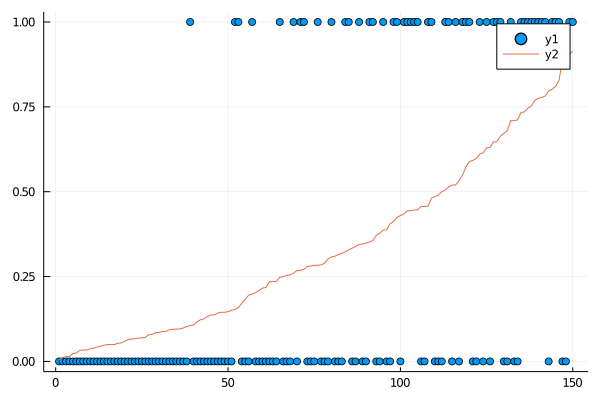

In [7]:
using Plots
logistic(x::Real) = inv(exp(-x) + one(x))
perm = sortperm(vec(X*beta.value))
plot(1:n, (Y[perm] .+ 1)/2, st=:scatter)
plot!(1:n, logistic.(X*beta.value)[perm])

## References

> Boyd, S., Kim, S.J., Vandenberghe, L. and Hassibi, A., 2007. A tutorial on geometric programming. Optimization and Engineering, 8(1), p.67. <https://doi.org/10.1007/s11081-007-9001-7>

> Glineur, F., 2000. An extended conic formulation for geometric optimization. Foundation of Computing and Decision Sciences, 25(3), p.161. <http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.31.9181>

> Chandrasekaran, V. and Shah, P., 2017. Relative entropy optimization and its applications. Mathematical Programming, 161(1-2), pp.1-32. <https://doi.org/10.1007/s10107-016-0998-2>

## Acknowledgment

Many parts of this lecture note is based on [Dr. Hua Zhou](http://hua-zhou.github.io)'s 2019 Spring Statistical Computing course notes available at <http://hua-zhou.github.io/teaching/biostatm280-2019spring/index.html>.